In [1]:
#Importing the libraries necessary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import time


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset and perform initial exploratory data analysis. 

data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(data.head(n=3))
print(test_data.head(n=3))

       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  462809    Male           No   22        No  Healthcare              1.0   
1  462643  Female          Yes   38       Yes    Engineer              NaN   
2  466315  Female          Yes   67       Yes    Engineer              1.0   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   

  Spending_Score  Family_Size  Var_1  
0            Low          1.0  Cat_6  
1        Average          4.0  Cat_6  
2            Low          1.0  Cat_6  


1. Data Preprocessing:

In [3]:
# Getting the information regarding the data..
print(data.info())
data = data.sample(frac=1)
# After the careful observation we can say that the data consists of null values.
# We need to handle them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None


In [4]:
# Info about the test data.
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB
None


In [5]:
# Before removing the null values.
# From the observation we can impute one column which is Work_Experience column where a large chunk of data is getting missed.
# Impute based on the mean.

imputer = SimpleImputer(strategy='mean')
data['Work_Experience']=imputer.fit_transform(data[['Work_Experience']])
test_data['Work_Experience']=imputer.fit_transform(test_data[['Work_Experience']])

In [6]:
# Handle null values appropriately (e.g., using imputation or removal).
# Dropna will help in dropping the rows with the null values.
data_modified = data.dropna()
test_data_modified = test_data.dropna()
print(data_modified.shape,test_data.shape)

(7376, 11) (2627, 10)


In [7]:
# Convert categorical variables to a suitable numerical format. 
# Using Label Encoder for categorising data.

def fun_label_enc(data):
    label_enc = LabelEncoder()
    data['Gender']=label_enc.fit_transform(data['Gender'])
    data['Ever_Married']=label_enc.fit_transform(data['Ever_Married'])
    data['Graduated']=label_enc.fit_transform(data['Graduated'])
    data['Profession']=label_enc.fit_transform(data['Profession'])
    data['Spending_Score']=label_enc.fit_transform(data['Spending_Score'])
    data['Var_1']=label_enc.fit_transform(data['Var_1'])
    if(data.shape[1]==11):
        data['Segmentation']=label_enc.fit_transform(data['Segmentation'])
        
    return data

In [8]:
enc_data = fun_label_enc(data_modified)
enc_test_data = fun_label_enc(test_data_modified)

print(enc_data.tail(n=2))
# print(enc_test_data.tail(n=2))

          ID  Gender  Ever_Married  Age  Graduated  Profession  \
2047  464278       1             1   85          1           4   
46    465729       1             1   41          1           0   

      Work_Experience  Spending_Score  Family_Size  Var_1  Segmentation  
2047              1.0               1          2.0      5             3  
46                0.0               0          4.0      3             1  


In [9]:
X=enc_data.drop(columns=['Segmentation','ID'])
y=enc_data['Segmentation'].values

In [10]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [11]:
encoder = OneHotEncoder(sparse_output=False)
y_enc = encoder.fit_transform(y.reshape(-1,1))
print(y_enc.shape)
print(y_enc)

(7376, 4)
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [12]:
# Splitting the training and testing data separately from the training data.
X_train,X_test,y_train,y_test = train_test_split(X,y_enc,test_size=0.2,random_state=47)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5900, 9)
(1476, 9)
(5900, 4)
(1476, 4)


In [13]:
print(X_train.shape[0],X_train.shape[1])

5900 9


2. Neural Network Implementation from Scratch: 

In [14]:
class Two_Layer_NN:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
        self.activation_functions = {
            'sigmoid': (self.sigmoid, self.der_sigmoid, self.cross_entropy),
            'relu': (self.relu, self.der_relu, self.mse)
        }
    
    # For two-layer neural network, we need the sigmoid function and its derivative.
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def der_sigmoid(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    
    # relu is f(x)=0 when x<=0 and f(x)=x when x is x>0
    def relu(self, z):
        return np.maximum(0, z)
    
    # derivative of relu is f'(x)=0 when x<=0 and f'(x)=1 when x is x>0
    def der_relu(self, z):
        return np.where(z <= 0, 0, 1)
    
    def mse(self, y, y2, m):
        return np.mean(np.square(y - y2))
    
    def cross_entropy(self, y, y2, m):
        return -1.0/m * np.sum(np.sum(y*np.log(y2)) + np.sum((1-y)*np.log(1-y2)))
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
        return exp_z / np.sum(exp_z, axis=0, keepdims=True)
    
    def nn(self, X, y, num_iterations, initial_alpha, activation_func, decay_rate, decay_steps):
        
        # Number of neurons in the hidden layer will be equal to 64.
        hidden_layer_neurons = 64
        
        m = X.shape[1]  # Number Of data Samples
        n = X.shape[0]  # Number of features
        w1 = np.random.randn(hidden_layer_neurons, n)
        b1 = np.random.randn(hidden_layer_neurons, 1)
        w2 = np.random.randn(4, hidden_layer_neurons)
        b2 = np.random.randn(4, 1)
        
        loss_func = [[], []]
        
        activation_function, der_activation_function, lf = self.activation_functions[activation_func]
        print(activation_func)
        
        alpha = initial_alpha
        
        for iteration in range(num_iterations):
            
            # Decay learning rate
            if iteration % decay_steps == 0:
                alpha *= decay_rate
            
            # Forward Propagation
            z1 = np.dot(w1, X) + b1
            y1 = activation_function(z1)
            
            z2 = np.dot(w2, y1) + b2
            y2 = self.softmax(z2)  # Using softmax for output layer
            
            # Calculate loss
            loss = lf(y, y2, m)    
            loss_func[0].append(iteration)
            loss_func[1].append(loss)
                
            # Backward Propagation
            dz2 = y2 - y
            dw2 = np.dot(dz2, y1.T)/m
            db2 = np.sum(dz2, axis=1, keepdims=True)/m
            dz1 = np.dot(w2.T, dz2) * der_activation_function(z1)
            dw1 = np.dot(dz1, X.T)/m
            db1 = np.sum(dz1, axis=1, keepdims=True)/m

            # Update weights and biases
            w2 -= alpha * dw2
            b2 -= alpha * db2
            w1 -= alpha * dw1
            b1 -= alpha * db1
            
        return w1, b1, w2, b2, loss_func

sigmoid
Execution Time is:  93.53131031990051


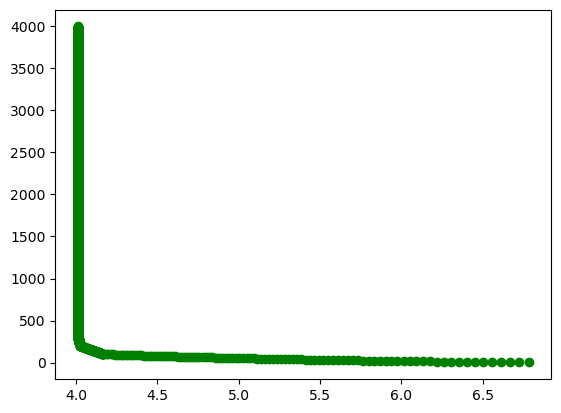

In [15]:
alpha = 0.1
iterations = 4000
obj = Two_Layer_NN(X_train,y_train)
start_time=time.time()
w1, b1, w2, b2, cost_list = obj.nn(X_train.T,y_train.T,iterations,alpha,'sigmoid', 0.1, 100)
end_time=time.time()
print("Execution Time is: ",(end_time-start_time))
# print('W1=',w1, '\n', 'b1=',b1, '\n', 'W2=',w2, '\n', 'b2=',b2)
plt.plot(cost_list[1][1:],cost_list[0][1:], 'go')

In [16]:
def sigmoid(z):
        return 1 / (1 + np.exp(-z))

def relu(z):
        return np.maximum(0, z)

In [17]:
def predict(X, w1, b1, w2, b2, func):
    # Forward propagation
    z1 = np.dot(w1, X) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    
    # Threshold output to get binary predictions
    predictions = np.round(a2)
    return predictions

def evaluate(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    return accuracy

In [18]:
# Assume you have already trained the model and obtained the weights and biases

# Predict using trained model
y_train_pred = (predict(X_train.T, w1, b1, w2, b2,'sigmoid')).T
y_test_pred = (predict(X_test.T, w1, b1, w2, b2,'sigmoid')).T

# Evaluate the model
train_accuracy = evaluate(y_train, y_train_pred)
test_accuracy = evaluate(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.6196610169491525
Test Accuracy: 0.627710027100271


In [19]:
# Additional evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Training Confusion Matrix:")
print(confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_train_pred,axis=1)))

print("Test Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_test_pred,axis=1)))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.33      0.30      1408
           1       0.23      0.16      0.19      1407
           2       0.11      0.10      0.11      1467
           3       0.29      0.31      0.30      1618

   micro avg       0.23      0.23      0.23      5900
   macro avg       0.23      0.23      0.23      5900
weighted avg       0.23      0.23      0.23      5900
 samples avg       0.12      0.23      0.15      5900

Test Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.34      0.32       379
           1       0.23      0.20      0.21       332
           2       0.15      0.13      0.14       393
           3       0.27      0.29      0.28       372

   micro avg       0.25      0.24      0.24      1476
   macro avg       0.24      0.24      0.24      1476
weighted avg       0.24      0.24      0.24      1476
 samples avg     

relu
Execution Time is:  33.08938503265381


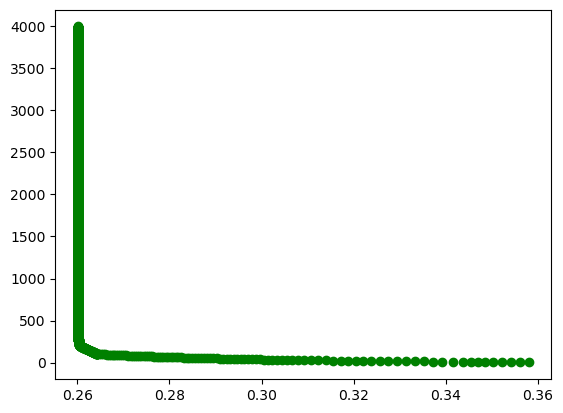

In [20]:
alpha = 0.1
iterations = 4000
obj1 = Two_Layer_NN(X_train,y_train)
func='relu'
start_time = time.time()
w11, b11, w22, b22, cost_list1 = obj1.nn(X_train.T, y_train.T, iterations, alpha, func, 0.1, 100)
end_time = time.time()
print("Execution Time is: ",(end_time-start_time))
# print('W1=',w11, '\n', 'b1=',b11, '\n', 'W2=',w22, '\n', 'b2=',b22)
plt.plot(cost_list1[1][1:],cost_list1[0][1:], 'go')

In [21]:
# Predict using trained model
y_train_pred_relu = (predict(X_train.T, w11, b11, w22, b22,'relu')).T
y_test_pred_relu = (predict(X_test.T, w11, b11, w22, b22,'relu')).T

print(y_train_pred_relu.shape,y_test_pred_relu.shape)

# Evaluate the model
train_accuracy_relu = evaluate(y_train, y_train_pred_relu)
test_accuracy_relu = evaluate(y_test, y_test_pred_relu)

print("Training Accuracy:", train_accuracy_relu)
print("Test Accuracy:", test_accuracy_relu)

(5900, 4) (1476, 4)
Training Accuracy: 0.3252118644067797
Test Accuracy: 0.32994579945799457


In [22]:
# Additional evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Training Classification Report:")
print(classification_report(np.argmax(y_train,axis=1),np.argmax(y_train_pred_relu,axis=1)))

print("Test Classification Report:")
print(classification_report(np.argmax(y_test,axis=1),np.argmax(y_test_pred_relu,axis=1)))

print("Training Confusion Matrix:")
print(confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_train_pred_relu,axis=1)))

print("Test Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_test_pred_relu,axis=1)))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.99      0.39      1408
           1       0.13      0.00      0.01      1407
           2       0.14      0.00      0.00      1467
           3       0.33      0.00      0.00      1618

    accuracy                           0.24      5900
   macro avg       0.21      0.25      0.10      5900
weighted avg       0.22      0.24      0.10      5900

Test Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.99      0.41       379
           1       0.00      0.00      0.00       332
           2       0.50      0.01      0.01       393
           3       0.00      0.00      0.00       372

    accuracy                           0.25      1476
   macro avg       0.19      0.25      0.10      1476
weighted avg       0.20      0.25      0.11      1476

Training Confusion Matrix:
[[1398    8    2    0]
 [1398    6    1    

3. Neural Network using Scikit-learn: 


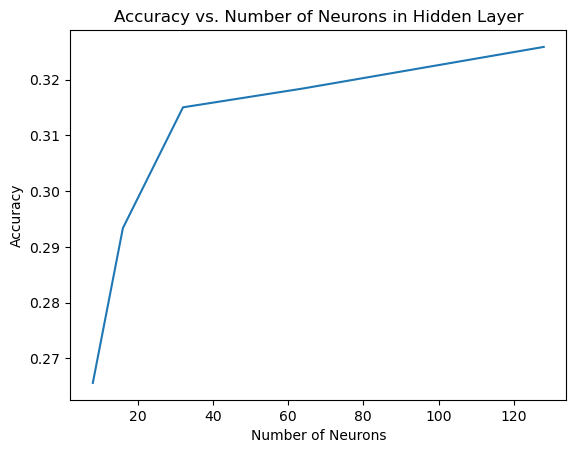

In [23]:
from sklearn.neural_network import MLPClassifier

# Two-layer neural network
mlp_classifier_2_layers = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=1000)
mlp_classifier_2_layers.fit(X_train, y_train)

# Three-layer neural network
mlp_classifier_3_layers = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000)
mlp_classifier_3_layers.fit(X_train, y_train)

# Investigate accuracy with different number of neurons
neuron_counts = [8, 16, 32, 64, 128]
accuracies = []
for neurons in neuron_counts:
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(neurons,), activation='relu', max_iter=1000)
    mlp_classifier.fit(X_train, y_train)
    accuracies.append(mlp_classifier.score(X_test, y_test))

# Plot the graph
import matplotlib.pyplot as plt
plt.plot(neuron_counts, accuracies)
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neurons in Hidden Layer')
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, np.argmax(y_train,axis=1))

LogisticRegression(max_iter=1000)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate neural network models
y_pred_mlp_2_layers = mlp_classifier_2_layers.predict(X_test)
y_pred_mlp_3_layers = mlp_classifier_3_layers.predict(X_test)

print("MLP Classifier (Two Layers):")
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_mlp_2_layers,axis=1)))
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred_mlp_2_layers,axis=1)))

print("MLP Classifier (Three Layers):")
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_mlp_3_layers,axis=1)))
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred_mlp_3_layers,axis=1)))

# Evaluate logistic regression model
y_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression:")
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred_logistic))
print(classification_report(np.argmax(y_test, axis=1), y_pred_logistic))

MLP Classifier (Two Layers):
[[300  11  13  55]
 [230  24  55  23]
 [180   7 163  43]
 [142   2   2 226]]
              precision    recall  f1-score   support

           0       0.35      0.79      0.49       379
           1       0.55      0.07      0.13       332
           2       0.70      0.41      0.52       393
           3       0.65      0.61      0.63       372

    accuracy                           0.48      1476
   macro avg       0.56      0.47      0.44      1476
weighted avg       0.56      0.48      0.45      1476

MLP Classifier (Three Layers):
[[268  42  28  41]
 [186  69  59  18]
 [160  40 170  23]
 [165  12  12 183]]
              precision    recall  f1-score   support

           0       0.34      0.71      0.46       379
           1       0.42      0.21      0.28       332
           2       0.63      0.43      0.51       393
           3       0.69      0.49      0.57       372

    accuracy                           0.47      1476
   macro avg       0.52  